# Decoding Coursera: An EDA of Course Popularity and Quality

## Table of Contents

- [Introduction](#introduction)

    - [Project Objectives](#project-objectives)
    - [Data Brief](#data-brief)
    - [Required Modules](#required-modules)
    - [Load the dataset](#load-the-dataset)

- [Data Cleaning](#data-cleaning)

    - [Missing Values](#missing-values)
    - [Duplicated Values](#duplicated-values)
    - [Removing unnecessary columns](#removing-unnecessary-columns)
    - [Fixing 'course_students_enrolled' column](#fixing-course_students_enrolled-column)
    - [Data Info](#data-info)

- [Analysis](#analysis)

    - [Brief Introduction](#brief-introduction)
    - [Analysis of Course Ratings & Categories](#analysis-of-course-ratings--categories)
        - [Distribution of Course Ratings](#distribution-of-course-ratings)
        - [Distribution of Course Difficulty](#distribution-of-course-difficulty)
        - [Course Rating Distribution by Difficulty Level](#course-rating-distribution-by-difficulty-level)
        - [Distribution of Certificate Type](#distribution-of-certificate-type)
        - [Course Rating Distribution by Certificate Type](#course-rating-distribution-by-certificate-type)
        - [Distribution of Certificate Type by Course Difficulty](#distribution-of-certificate-type-by-course-difficulty)
    - [Course Enrollment Patterns](#course-enrollment-patterns)
        - [Distribution of Course Enrollment](#distribution-of-course-enrollment)
        - [Enrollment Distribution by Difficulty](#enrollment-distribution-by-difficulty)
        - [Enrollment Distribution by Certificate Type](#enrollment-distribution-by-certificate-type)
        - [Distribution of Courses by Rating vs. Enrollment](#distribution-of-courses-by-rating-vs-enrollment)
    - [Course Organization Analysis](#course-organization-analysis)
        - [Organization Landscape - Course Volume](#organization-landscape---course-volume)
        - [Organization Reach - Total Enrollment](#organization-reach---total-enrollment)
        - [Organization Efficiency - Median Enrollment per Course](#organization-efficiency---median-enrollment-per-course)
        - [Organization Reputation - Average Rating](#organization-reputation---average-rating)
    - [High Impact Courses](#high-impact-courses)
- [Main Findings](#main-findings)
- [Further Analysis Suggestions and Improvements](#further-analysis-suggestions-and-improvements)

# Introduction

This dataset is taken from **Kaggle**. The data itself was scrapped from *Coursera's* official website. 

This report presents an **exploratory data analysis** of a dataset containing information on various online courses. The rapidly evolving landscape of online education necessitates a data driven understanding of course characteristics, student engagement and provider performance. By analyzing key metrics, this analysis aims to uncover significant patterns and relationships within the dataset. Derived insights will contribute to a better understanding of factors that may influence the perceived course popularity and quality.

---



## Project Objectives

- Load, inspect and clean the data using Pandas

- Assess the overall distribution of course quality

- Analyze the relationship between course quality and popularity

- Investigate the influence of course characteristics (such as difficulty level and certificate type) on ratings and enrollment.

- Identify and compare the top performing institutions

- Structure and communicate findings to provide data driven insights

---

## Data Brief

| Column        | Description                                 |
|----------------|---------------------------------------------|
| **course_title**     | Contains the course title                |
| **course_organization** | Contains the organization of the course      |
| **course_Certificate_type**   | Details about the different type of certifications |
| **course_rating**| Rating associated with the course  |
| **course_difficulty**| Details the difficulty of the course  |
| **course_students_enrolled** | The number of students enrolled in the course |

---

### Required Modules

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


---

### Load the dataset

In [3]:
data = pd.read_csv('coursea_data.csv')
backup = data.copy() # a data backup, just in case

In [4]:
data.head(5)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


---

## Data Cleaning

### Missing values

In [5]:
data.isnull().any()

Unnamed: 0                  False
course_title                False
course_organization         False
course_Certificate_type     False
course_rating               False
course_difficulty           False
course_students_enrolled    False
dtype: bool

##### Seems like there are no missing values
---

### Duplicated values

In [6]:
data.duplicated().any()

np.False_

##### No duplicate values found

In [7]:
duplicate_titles = data[data['course_title'].duplicated(keep=False)]

non_unique_titles = duplicate_titles['course_title'].unique()

print("Duplicated course titles:")
for title in non_unique_titles:
    print(title)

duplicate_titles.sort_values(by='course_title')

Duplicated course titles:
Developing Your Musicianship
Machine Learning
Marketing Digital


,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
224,756,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41k
225,205,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54k
563,181,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290k
564,6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m
582,241,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81k
583,325,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39k


There are some duplicate **course_titles** found, but upon closer inspection we can see that these are from a different organization *or* a different **Certificate_type**

---

### Removing unnecessary columns

In [8]:
data.columns

Index(['Unnamed: 0', 'course_title', 'course_organization',
       'course_Certificate_type', 'course_rating', 'course_difficulty',
       'course_students_enrolled'],
      dtype='object')

In [9]:
data = data.drop('Unnamed: 0', axis=1)

---

### Fixing 'course_students_enrolled' column

In [10]:
unique_enroll = data['course_students_enrolled'].unique()

unexpected_enroll = [ x for x in unique_enroll
                     if isinstance(x, (int, float)) or (isinstance(x, str) and not x.lower().endswith(('k', 'm')))]

if unexpected_enroll:
    print("Found numeric values or strings without 'k' or 'm' at the end:")
    for x in unexpected_enroll:
        print(x)
else:
    print("All unique values are strings ending with 'k' or 'm'.")

All unique values are strings ending with 'k' or 'm'.


In [11]:
def convert_enrollment(enroll):
    enroll = str(enroll).lower()
    if 'm' in enroll:
        return float(enroll.replace('m', '')) * 1000000
    elif 'k' in enroll:
        return float(enroll.replace('k', '')) * 1000
    else:
        return float(enroll)
    
data['course_students_enrolled_num'] = data['course_students_enrolled'].apply(convert_enrollment)

This results in a new column creation named **'course_students_enrolled_num'** which is a conversion from the existing **'course_students_enrolled'** column.

Example:

**77k = 77000**

**2.1m = 2100000**

In [12]:
data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,course_students_enrolled_num
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k,5300.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k,130000.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k,91000.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k,320000.0


---

### Data Info

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   course_title                  891 non-null    object 
 1   course_organization           891 non-null    object 
 2   course_Certificate_type       891 non-null    object 
 3   course_rating                 891 non-null    float64
 4   course_difficulty             891 non-null    object 
 5   course_students_enrolled      891 non-null    object 
 6   course_students_enrolled_num  891 non-null    float64
dtypes: float64(2), object(5)
memory usage: 48.9+ KB


---

# Analysis

### Brief Introduction

In [14]:
org_unique = len(data['course_organization'].unique())

course_unique = len(data[['course_title', 'course_organization', 'course_Certificate_type']])

certificate_unique = list(data['course_Certificate_type'].unique())

min_rating = data['course_rating'].min()
max_rating = data['course_rating'].max()

difficulty_unique = list(data['course_difficulty'].unique())

total_students_enrolled = data['course_students_enrolled_num'].sum()

print(f'''Unique Organizations: {org_unique}
Unique Courses: {course_unique}
Available Certificates: {certificate_unique}
Min and Max Course Rating: {min_rating} | {max_rating}
Difficulty Levels: {difficulty_unique}
Total number of students enrolled in ALL courses: {total_students_enrolled:,}''')


Unique Organizations: 154
Unique Courses: 891
Available Certificates: ['SPECIALIZATION', 'COURSE', 'PROFESSIONAL CERTIFICATE']
Min and Max Course Rating: 3.3 | 5.0
Difficulty Levels: ['Beginner', 'Intermediate', 'Mixed', 'Advanced']
Total number of students enrolled in ALL courses: 80,681,900.0


In this dataset there are **154** Organizations that offer **891** unique courses.

These courses have different certificate types: **Specialization, Professional Certificate** and **Course**

The course difficulty levels are: **Beginner, Intermediate, Mixed** and **Advanced**

Course ratings range from **3.3** to **5.0**

In total, there are **80,681,900** enrolled accounts. Obviously this does not account for duplicates since one person could be enrolled in multiple courses.

---

## Analysis of Course Ratings & Categories

### Distribution of Course Ratings

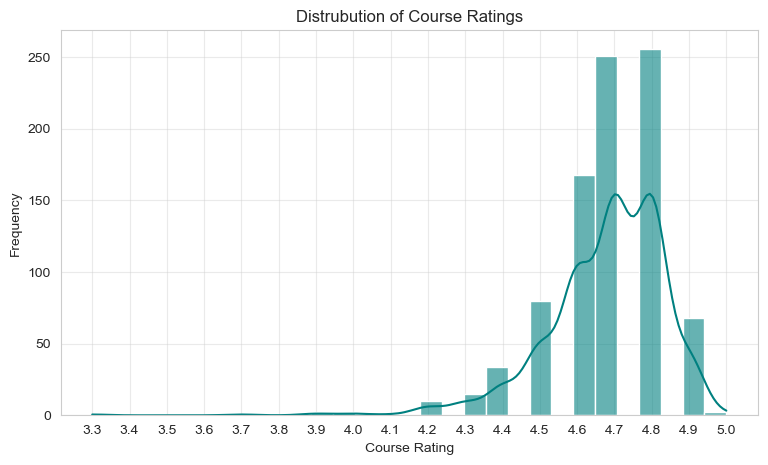

In [15]:
num_ratings = len(data['course_rating'])
sqrt_bins = int(np.sqrt(num_ratings))

plt.figure(figsize=(9,5))
sea.set_style('whitegrid')
sea.histplot(data=data, x='course_rating', kde=True, bins=sqrt_bins, color='teal', alpha=0.6)
plt.title('Distrubution of Course Ratings')
plt.xlabel('Course Rating')
plt.ylabel('Frequency')
plt.xticks(np.arange(data['course_rating'].min(), data['course_rating'].max() + 0.1, 0.1))
plt.grid(alpha=0.4)
plt.show()

A striking feature is the heavy skew toward the top end of the rating scale: the vast majority of courses receive high marks. It also indicates that *Coursera* generally hosts high quality courses that are favored among the students.

---

### Distribution of Course Difficulty

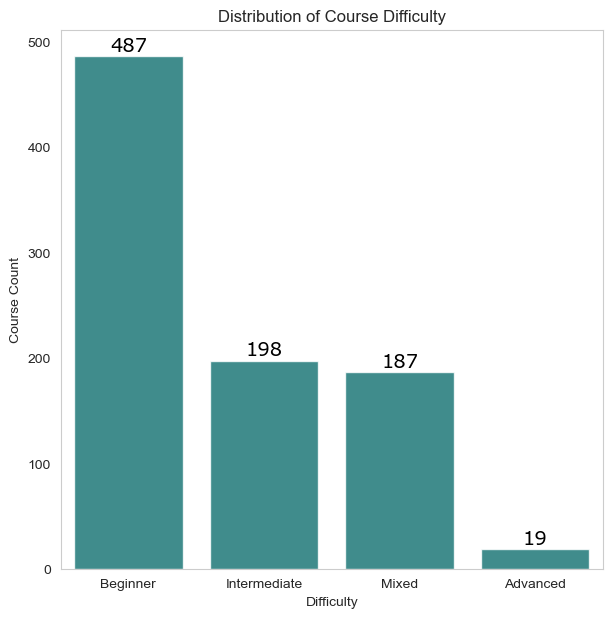

In [16]:
plt.figure(figsize=(7, 7))
ax = sea.countplot(data=data, x='course_difficulty', order=data['course_difficulty'], color='teal', alpha=0.8)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 4, int(height), ha="center", color='black', size='14', family='Verdana')

plt.title('Distribution of Course Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Course Count')
plt.grid(False)
plt.show()

We can see that the **Beginner** difficulty accounts for more than half of all courses. While the **Advanced** difficulty offers only **19** courses. Potential reasons:

- Coursera aims to be accessible to a wider audience, having lots of **Beginner** courses creates a low entry barrier.
- The majority of courses being **Beginner**, indicates a belief held by course providers that this difficulty level has the most demand.
- **Beginner** courses are a starting point. Not everyone can/wants to move to more complex topics.

---

### Course Rating Distribution by Difficulty Level

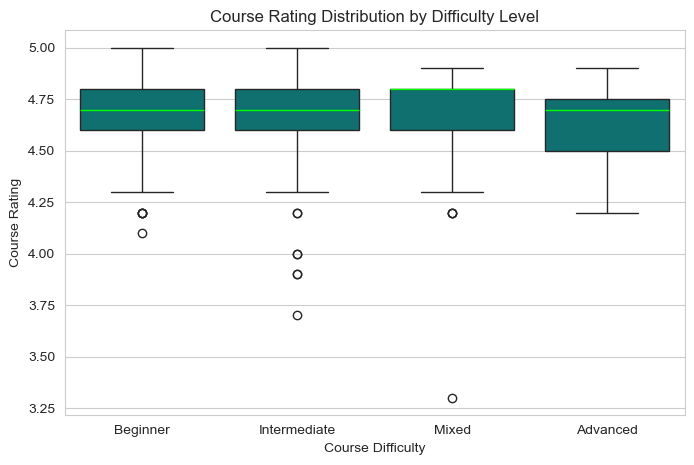

In [17]:
plt.figure(figsize=(8,5))
sea.boxplot(data=data, x='course_difficulty', y='course_rating', order=['Beginner', 'Intermediate', 'Mixed', 'Advanced'], color='teal',
            medianprops={'color': 'lime'})
plt.title('Course Rating Distribution by Difficulty Level')
plt.xlabel('Course Difficulty')
plt.ylabel('Course Rating')
plt.show()

In [18]:
cf = data.groupby('course_difficulty')['course_rating']
cf.describe()

,count,mean,std,min,25%,50%,75%,max
course_difficulty,,,,,,,,
Advanced,19.0,4.600000,0.194365,4.2,4.5,4.7,4.75,4.9
Beginner,487.0,4.680903,0.141947,4.1,4.6,4.7,4.80,5.0
Intermediate,198.0,4.646465,0.188939,3.7,4.6,4.7,4.80,5.0
Mixed,187.0,4.708556,0.170803,3.3,4.6,4.8,4.80,4.9


The plot suggests that overall the ratings skew positively among all difficulty levels. Median levels for all are **4.7** except for **Mixed** which is at **4.8**

However, we can see some lower-rated outliers in the **Intermediate** and **Mixed** categories. Additionally, the **Advanced** difficulty has a larger box size (IQR), indicating more variability in the 50% of those courses.

The differences between these levels are minor, but some potential explanations for low-rated outliers and larger IQR box for **Advanced** is that:
- Higher course difficulty can make it challenging for students to grasp the content effectively.
- **Advanced** topics are inherently more complex and can be harder to present in a clear and engaging way.
- Courses that are aimed at experienced learners tend to attract knowledgeable and discerning students, which can lead to critical ratings.
- Since **Beginner** courses account for more than half of all courses, any divergence from the norm is balanced out by the amount of data, this is most prevalent in the **Advanced** difficulty, which only has **19** courses.

---

### Distribution of Certificate Type

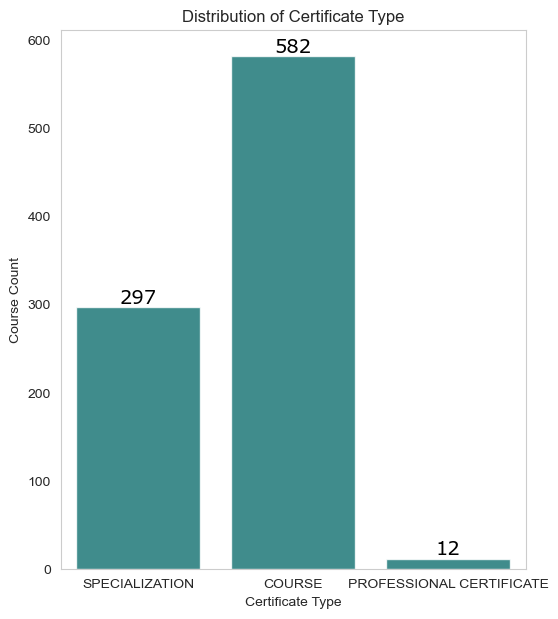

In [19]:
plt.figure(figsize=(6, 7))
ax = sea.countplot(data=data, x='course_Certificate_type', order=data['course_Certificate_type'], color='teal', alpha=0.8,)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 4, int(height), ha="center", color='black', size='14', family='Verdana')

plt.title('Distribution of Certificate Type')
plt.xlabel('Certificate Type')
plt.ylabel('Course Count')
plt.grid(False)
plt.show()

**Course** certificate type accounts for over **65%** of all types. While **Specialization** and **Professional Certificate** are around **33.3%** and **1.3%** respectively.

- Some justifications as to why **Professional Certificate** has such a low course count could be in the complexity of creating it and the low overall learner demand for such courses.
- **Specialization** courses might have less options for similar reasons discussed in **Difficulty Level Distributions**. Compared to individual **Courses**, **Specializations** can be more complex and demand more from the student.

---

### Course Rating Distribution by Certificate Type

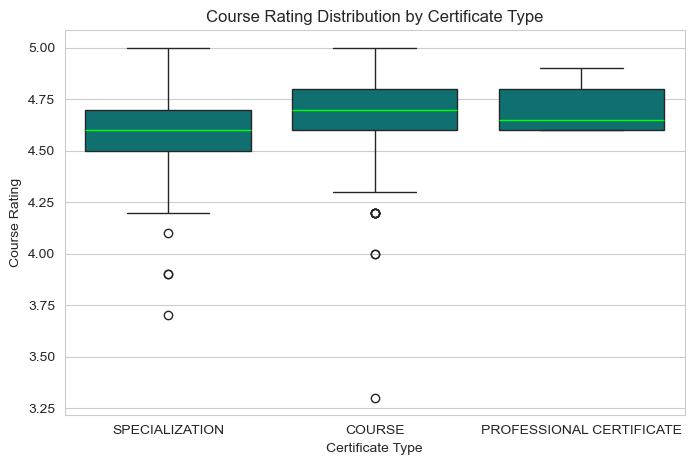

In [20]:
plt.figure(figsize=(8,5))
sea.boxplot(data=data, x='course_Certificate_type', y='course_rating', order=data['course_Certificate_type'], color='teal',
            medianprops={'color': 'lime'})
plt.title('Course Rating Distribution by Certificate Type')
plt.xlabel('Certificate Type')
plt.ylabel('Course Rating')
plt.show()

In [21]:
cct = data.groupby('course_Certificate_type')['course_rating']
cct.describe()

,count,mean,std,min,25%,50%,75%,max
course_Certificate_type,,,,,,,,
COURSE,582.0,4.707045,0.151647,3.3,4.6,4.70,4.8,5.0
PROFESSIONAL CERTIFICATE,12.0,4.700000,0.120605,4.6,4.6,4.65,4.8,4.9
SPECIALIZATION,297.0,4.618182,0.167874,3.7,4.5,4.60,4.7,5.0


This plot convinces us further of the overall positive sentiment towards courses on *Coursera*, regardless of **Certificate type**. This is consistent with findings in **Course Difficulty**.

- Differences might be due to different learner expectations for each certificate type. It is reasonable to assume that students expect a higher level of quality from **Professional Certificates** and **Specializations**.
- Consistent high ratings for **Professional Certificates** could reflect stricter control and curriculum design.
- The wider whisker range for **Courses** indicates more variability in this category. Likely due to the volume of data and diversity of these courses.
---

### Distribution of Certificate Type by Course Difficulty

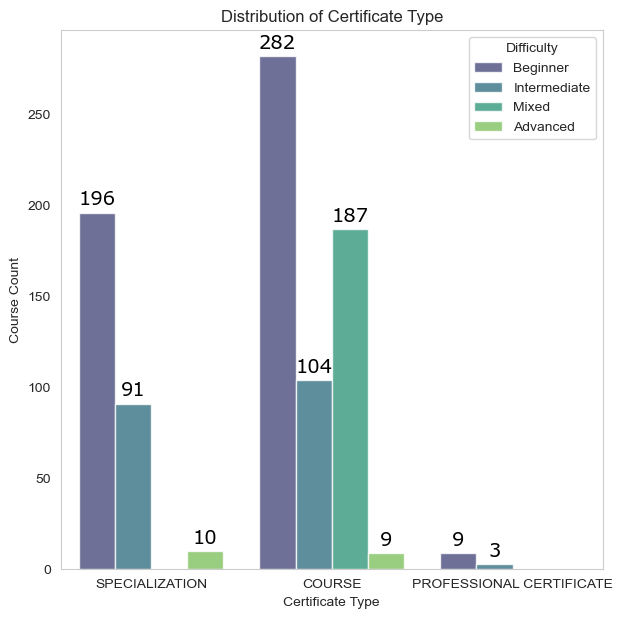

In [22]:
plt.figure(figsize=(7, 7))
ax = sea.countplot(data=data, x='course_Certificate_type', order=data['course_Certificate_type'], palette='viridis', alpha=0.8, hue='course_difficulty')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height + 4, int(height), ha="center", color='black', size='14', family='Verdana')

plt.title('Distribution of Certificate Type')
plt.xlabel('Certificate Type')
plt.ylabel('Course Count')
plt.legend(title='Difficulty')
plt.grid(False)
plt.show()

**Specialization** type offers a wide variety of beginner courses. This could be because this type is designed as a structured pathway course. For students who are new to the field, it can help build on foundational knowledge. Although, these might not extend into complex topics within the scope of the **Specialization**.
- For learners who are looking for comprehensive, multi-course programs starting at the basics, **Specializations** might be the correct choice.

**Course** type includes more varied difficulties, specifically **Mixed** level is present, which **Specializations** do not have. We can infer that this type offers a wider range of specific skill needs and learning preferences, including those at the beginning stage or who prefer a less linear learning experience (**Mixed**).
- Learners who seek specific skills or those looking for varied difficulty levels in a single course might find suitable options in the **Course** certificate type.

**Professional Certificate** offers only 12 courses, with 9 in **Beginner** and 3 in **Intermediate**. **Mixed** and **Advanced** are missing completely, meaning high level complexity is missing for this type. Since data is scarce for this type of certificate, making solid conclusions is difficult.

Also, since only the **Course** certificate type has **Mixed** as a difficulty, it is a contributing factor to a slightly wider range and lower outliers seen in individual **Courses** in the *"Course Rating by Certificate Type"* box plot.

---

## Course Enrollment Patterns

### Distribution of Course Enrollment

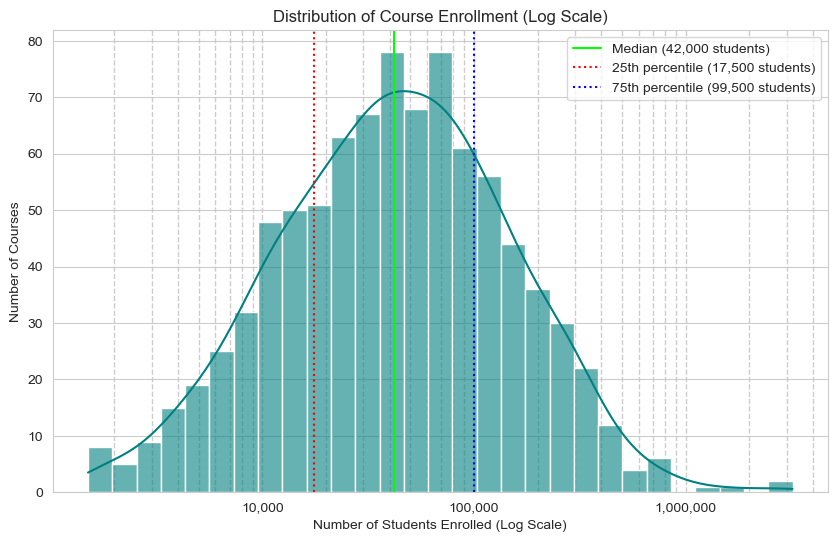

In [34]:
plt.figure(figsize=(10, 6))
sea.histplot(data=data, x='course_students_enrolled_num', kde=True, log_scale=True, bins=29, alpha=0.6, color='teal')
plt.title('Distribution of Course Enrollment (Log Scale)')
plt.xlabel('Number of Students Enrolled (Log Scale)')
plt.ylabel('Number of Courses')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.grid(True, which='both', linestyle='--', linewidth=1, axis='x')

# Percentile data and lines
median_enrollment = data['course_students_enrolled_num'].median()
q1 = data['course_students_enrolled_num'].quantile(0.25)
q3 = data['course_students_enrolled_num'].quantile(0.75)
plt.axvline(median_enrollment, color='lime', linestyle='-', linewidth=1.5, label=f'Median ({int(median_enrollment):,} students)')
plt.axvline(q1, color='red', linestyle=':', linewidth=1.5, label=f'25th percentile ({int(q1):,} students)')
plt.axvline(q3, color='blue', linestyle=':', linewidth=1.5, label=f'75th percentile ({int(q3):,} students)')

plt.legend()
plt.show()

**25th percentile (17,500 students)**: This is a lower-end benchmark for courses. A quarter of all courses have fewer than 17,500 students.

**Median / 50th percentile (42,000 students)**: This is the midpoint of course popularity. Half of the courses have 42,000 or fewer students, while the other half has more. This is a more representative enrollment representation than the average (mean), which due to a few popular outliers is skewed.

**75th percentile (99,500 students)**: This is the upper boundary of courses. 25% of courses have more than 99,500 students.

The distribution shape and the need for *Log Scale* confirms the skewness of the data. There are many courses with moderate enrollment, but still there are few with a high level of enrollment. This reinforces the idea that achieving massive enrollment is not the norm.

---

### Enrollment Distribution by Difficulty

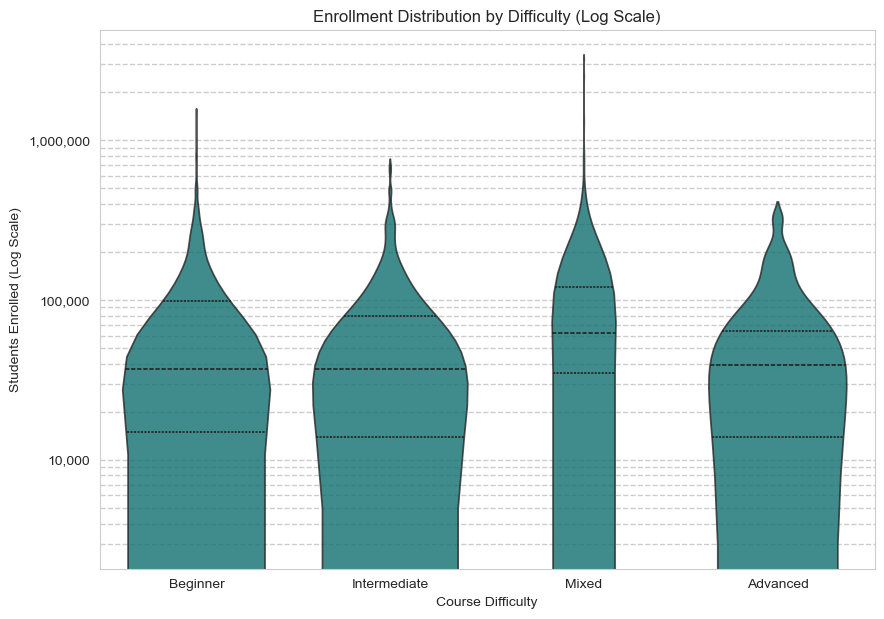

In [24]:
plt.figure(figsize=(10, 7))
sea.violinplot(data=data, x='course_difficulty', y='course_students_enrolled_num', inner='quartile', color='teal', alpha=0.8)
plt.yscale('log')
plt.title('Enrollment Distribution by Difficulty (Log Scale)')
plt.xlabel('Course Difficulty')
plt.ylabel('Students Enrolled (Log Scale)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.grid(True, which='both', linestyle='--', linewidth=1, axis='y')
plt.show()

From this chart, the stand-out difficulty appears to be **Mixed**. A shorter IQR box suggests that **50%** of **Mixed** courses are less spread-out compared to other difficulty levels. But we also see that it has the longest upper-tail of any difficulty.

- This infers that **Mixed** courses can be highly innovative and cutting-edge. These courses resonate with a large group of people, achieving massive popularity.

All course difficulty levels achieve moderate to high degree of enrollment.

---

### Enrollment Distribution by Certificate Type

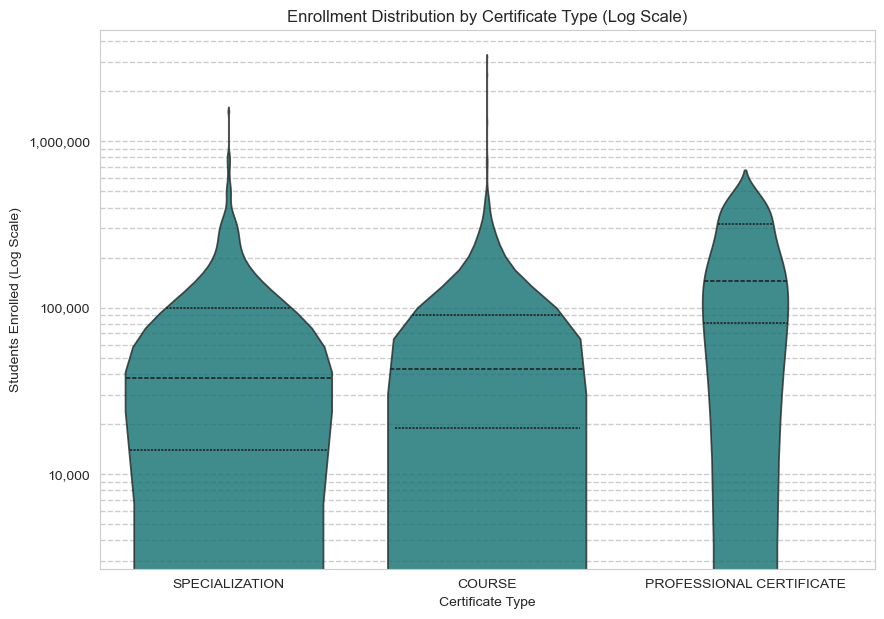

In [25]:
plt.figure(figsize=(10, 7))
sea.violinplot(data=data, x='course_Certificate_type', y='course_students_enrolled_num', inner='quartile', color='teal', alpha=0.8)
plt.yscale('log')
plt.title('Enrollment Distribution by Certificate Type (Log Scale)')
plt.xlabel('Certificate Type')
plt.ylabel('Students Enrolled (Log Scale)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.grid(True, which='both', linestyle='--', linewidth=1, axis='y')
plt.show()

This chart shows that **Professional Certificates** attract higher *(typically)* and more consistent enrollment:

- IQR and the median line are noticeably higher than other types:
    - Reason for this might be that this certificate type is tied to career advancement, which might drive higher enrollment from learners with clear career goals.
- IQR is shorter compared to other certificates and the violin shape is less spread out:
    - This might be the targeted nature of this certificate - higher perceived value and focused marketing could be the reasons leading to increased interest.

**Specialization** and **Course** types showcase similar results, both have wide shapes, both reach high level of enrollment *(millions)*. Both of these cater to a wide range of interests and popularity levels leading to a broader distribution.

---

### Distribution of Courses by Rating vs. Enrollment

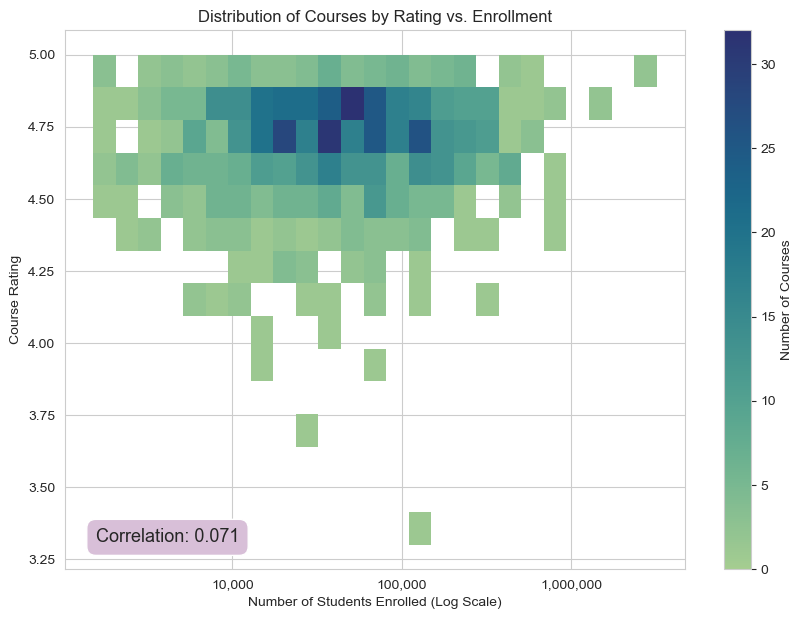

In [26]:
plt.figure(figsize=(10, 7))
sea.histplot(data=data, x='course_students_enrolled_num', y='course_rating', bins=(25, 15), log_scale=(True, False), 
             cbar=True, cmap='crest', cbar_kws={'label': 'Number of Courses'})

plt.title('Distribution of Courses by Rating vs. Enrollment')
plt.xlabel('Number of Students Enrolled (Log Scale)')
plt.ylabel('Course Rating')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

correlation = data['course_students_enrolled_num'].corr(data['course_rating'])
plt.text(0.05, 0.05, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, fontsize=13,
         bbox=dict(boxstyle='round,pad=0.5', fc='thistle'));
plt.show()

This heatmap visualizes the concentration of courses based on their rating and enrollment numbers.

The darker colors in this heatmap indicate that the most common type of course in *Coursera* is one with high ratings and an enrollment level roughly between **10,000** and **100,000** students.

High density extends over a wide range, meaning many courses are highly rated, regardless of enrollment numbers. This is further reinforced by calculating the correlation between enrollment and rating which is only **0.071**. In conclusion, while ratings can be a factor for course popularity (students are likely to filter by rating) there are other potential aspects in play (marketing, topic demand, organization reputation, course content, etc.)

---

## Course Organization Analysis

In [27]:
org_summary = data.groupby('course_organization').agg(
    course_count = ('course_title', 'count'),
    total_enrollment = ('course_students_enrolled_num', 'sum'),
    median_enrollment = ('course_students_enrolled_num', 'median'),
    avg_rating = ('course_rating', 'mean'),
    rating_count = ('course_rating', 'count')
).reset_index()

### Organization Landscape - Course Volume

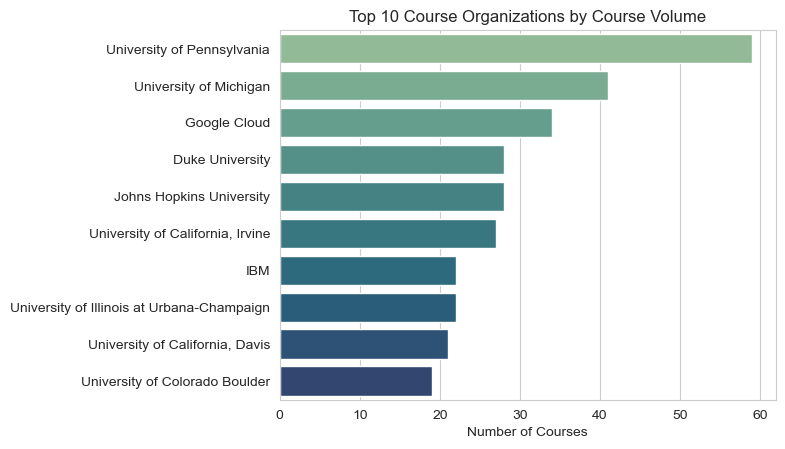

In [28]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    top_n = 10
    top_org_count = org_summary.nlargest(top_n, 'course_count')
    sea.barplot(data=top_org_count, y='course_organization', x='course_count', palette='crest')
    plt.title(f'Top {top_n} Course Organizations by Course Volume')
    plt.xlabel('Number of Courses')
    plt.ylabel('')
    plt.show()

These are the Top Organizations by course volume. The list is primarily dominated by Universities, with **IBM** and **Google Cloud** being the two exceptions.

---

### Organization Reach - Total Enrollment

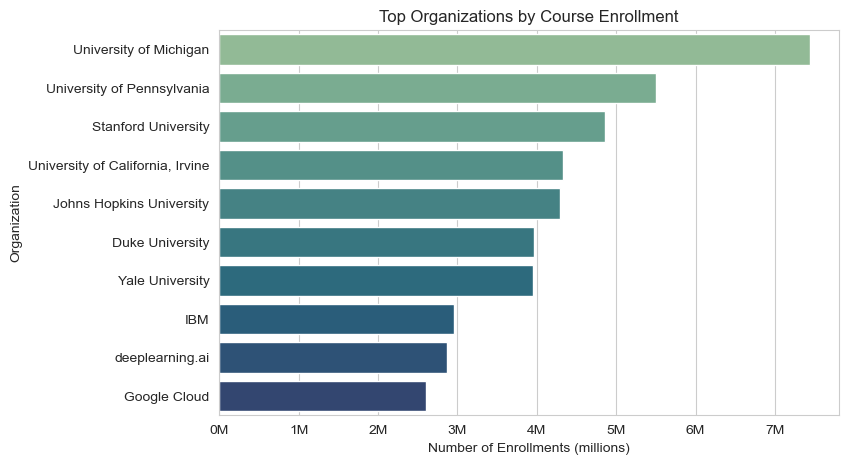

In [29]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)

    top_enrollment = org_summary.nlargest(top_n, 'total_enrollment')
    plt.figure(figsize=(8,5))
    sea.barplot(data=top_enrollment, x = 'total_enrollment', y='course_organization', palette='crest')
    plt.title('Top Organizations by Course Enrollment')
    plt.xlabel('Number of Enrollments (millions)')
    plt.ylabel('Organization')

    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000000)}M'))
    plt.show()

We can see that *Total Enrollment* and *Course Volume* have significant overlap. Suggesting that these are big providers with massive reach.

Three organizations **(Stanford University, Yale University and deeplearning.ai)** were not present in the previous chart *(Course Volume)*. Meaning that these organizations offer highly popular courses and they do not rely on *Course Volume*.

---

### Organization Efficiency - Median Enrollment per Course

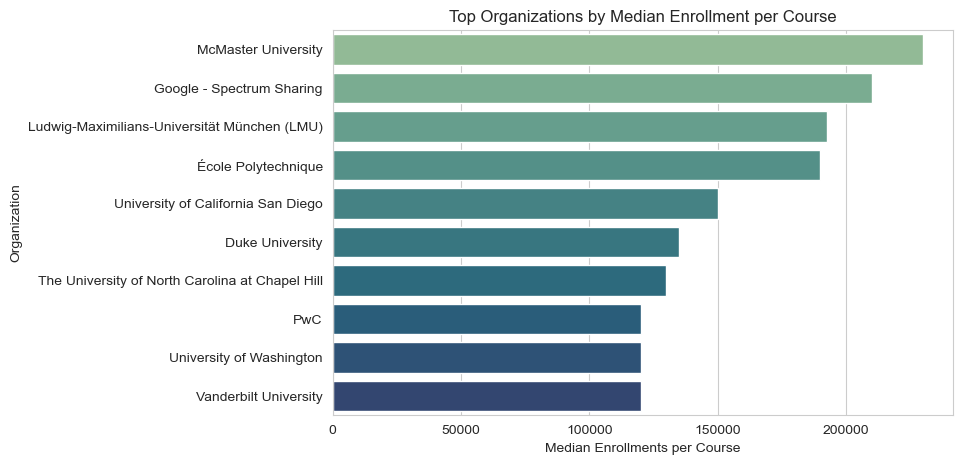

In [30]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)

    top_enrollment_med = org_summary.nlargest(top_n, 'median_enrollment')
    plt.figure(figsize=(8,5))
    sea.barplot(data=top_enrollment_med, x = 'median_enrollment', y='course_organization', palette='crest')
    plt.title('Top Organizations by Median Enrollment per Course')
    plt.xlabel('Median Enrollments per Course')
    plt.ylabel('Organization')
    plt.show()

Only one organization from this chart can be found in the previous *(Course Volume and Total Enrollment)* graphs, it's **Duke University**.

These organizations offer fewer courses overall, but the ones they do offer are consistently popular relative to the average course. This means these organizations are highly efficient - they get high enrollment for the courses they do release.

---

### Organization Reputation - Average Rating

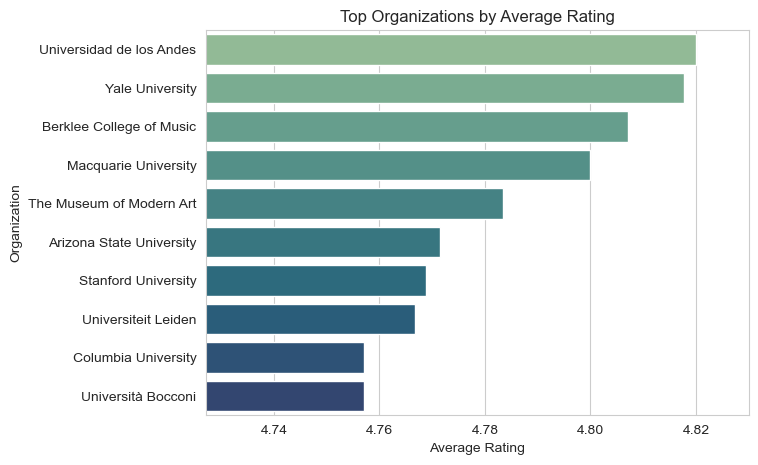

In [31]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    min_rating = 5
    org_ratings = org_summary[org_summary['rating_count'] >= min_rating]
    top_rated_org = org_ratings.nlargest(top_n, 'avg_rating')

    plt.figure(figsize=(7,5))
    sea.barplot(data=top_rated_org, y='course_organization', x='avg_rating', palette='crest')
    plt.xlim(top_rated_org['avg_rating'].min() - 0.03, top_rated_org['avg_rating'].max() + 0.01)
    plt.title('Top Organizations by Average Rating')
    plt.xlabel('Average Rating')
    plt.ylabel('Organization')
    plt.show()


These organizations, with at least **5** rated courses, consistently achieve the highest average ratings, suggesting high learner satisfaction with their content.

A minimum of 5 rated courses was chosen to filter through organizations that have only few courses, which might skew results.

**Yale University** and **Stanford University** are the only institutions that also appeared in earlier chart *(Course Enrollment)*, indicating a combination of high ratings and a massive student reach.

It is important to note that while the ratings are different for these organizations, the differences in these ratings are quite minor.

---

## High Impact Courses

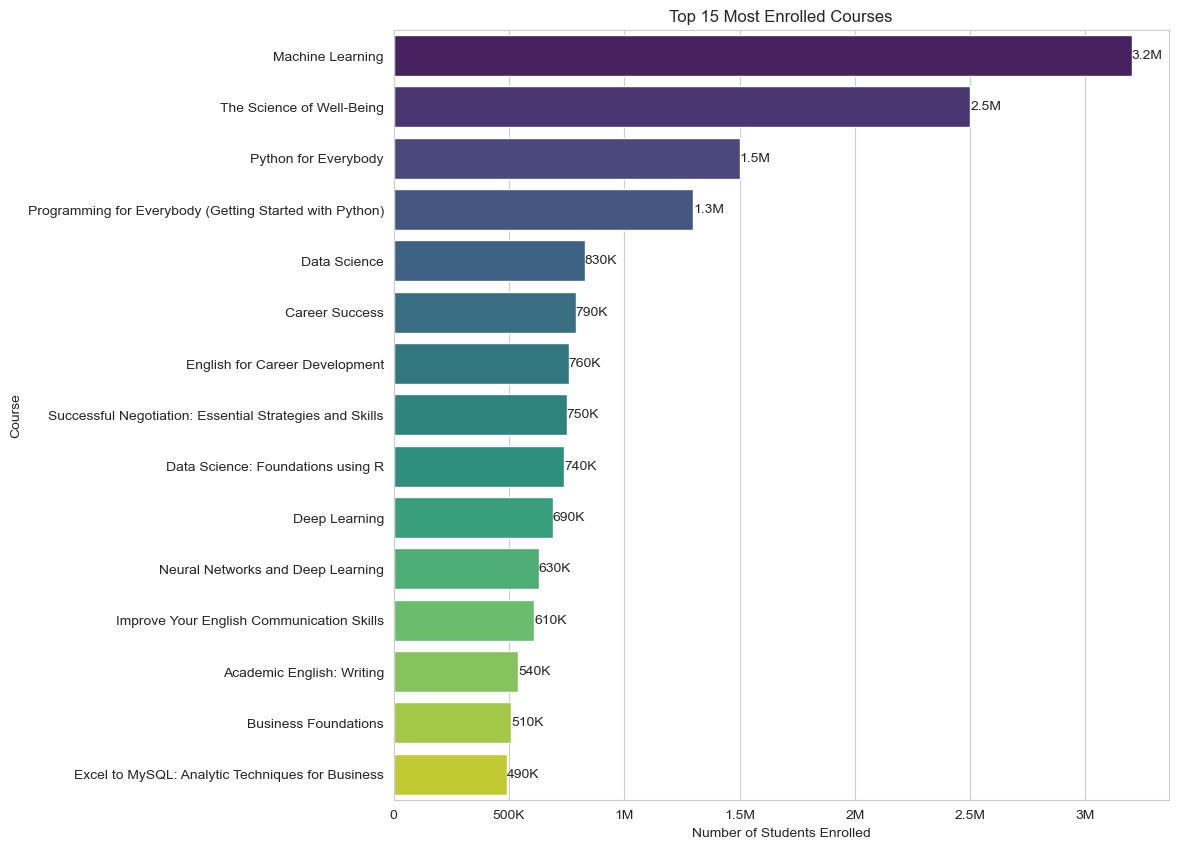

In [32]:
def better_formatter(x, pos):
    if x >= 1000000:
        return f'{x / 1000000:.1f}M' if x % 1000000 != 0 else f'{int(x / 1000000)}M'
    elif x >= 1000:
        return f'{x / 1000:.0f}K'
    else:
        return str(int(x))
    
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)

    n_top_courses = 15
    top_courses = data.nlargest(n_top_courses, 'course_students_enrolled_num')

    plt.figure(figsize=(10,10))
    ax = sea.barplot(data=top_courses, y='course_title', x='course_students_enrolled_num', palette='viridis')
    plt.title(f'Top {n_top_courses} Most Enrolled Courses')
    plt.xlabel('Number of Students Enrolled')
    plt.ylabel('Course')

    ax.xaxis.set_major_formatter(ticker.FuncFormatter(better_formatter))

    # Labels to bars
    for index, value in enumerate(top_courses['course_students_enrolled_num']):
        bar_text = better_formatter(value, index)
        plt.text(value, index, bar_text, va='center', fontsize=10)
    plt.show()

Top 15 most enrolled courses are dominated by foundational topics in **Tech** (Machine Learning, Python, Data Science, Programming, Deep Learning) and **Personal Development** (Science of Well-Being, Career Success, Writing, Communication, Negotiation)

There is a significant difference between **#1** Course and **#15** Course. Meaning only a couple of courses have such massive popularity (millions).

In [33]:
top_courses.drop(['course_students_enrolled', 'course_students_enrolled_num'], axis=1).rename(columns=
                                                            {'course_title': 'Title',
                                                            'course_organization': 'Organization',
                                                            'course_Certificate_type': 'Certificate',
                                                            'course_rating': 'Rating',
                                                            'course_difficulty': 'Difficulty'})

,Title,Organization,Certificate,Rating,Difficulty
564,Machine Learning,Stanford University,COURSE,4.9,Mixed
815,The Science of Well-Being,Yale University,COURSE,4.9,Mixed
688,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner
674,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed
196,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner
129,Career Success,"University of California, Irvine",SPECIALIZATION,4.4,Beginner
261,English for Career Development,University of Pennsylvania,COURSE,4.8,Mixed
765,Successful Negotiation: Essential Strategies a...,University of Michigan,COURSE,4.8,Mixed
199,Data Science: Foundations using R,Johns Hopkins University,SPECIALIZATION,4.6,Beginner
211,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate


From this we see a few specific organizations that appear multiple times:
- University of Michigan (3 courses)
- University of California, Irvine (2 courses)
- Johns Hopkins University (2 courses)
- University of Pennsylvania (2 courses)
- deeplearning.ai (2 courses)

This showcases that these organizations are particularly effective at developing engaging content that resonates with a big audience.

**Course** has 6 and **Specialization** has 9 courses, while **Professional Certificate** is missing from the Top 15. This indicates that both individual courses and multi-course specializations can achieve high levels of popularity.

**Beginner** is the most common difficulty level at 8 courses, **Mixed** is at 5, **Intermediate** at 2 and **Advanced** difficulty is absent. Meaning that while **Beginner** courses have high popularity, other difficulty levels that cover **Intermediate** skills and **Mixed** approach can also become extremely popular.

---

## Main Findings

- **High-quality Courses**
    - The vast majority of courses on *Coursera* are rated highly. Low ratings are rare, this indicates that the overall student satisfaction is highly positive.

- **Enrollment Distribution**
    - Course enrollment numbers are greatly skewed. The average enrollment is pulled up by a few extremely popular courses, but *typical* course enrollment is lower. The middle 50% of courses have enrollment numbers between **17,500** and **99,500**, while the most popular course stands at **3.2 million**.

- **High Ratings ≠ High Enrollment**
    - While most courses are highly rated, that does not guarantee massive enrollment. This is influenced by other factors beyond the perceived quality of ratings.

- **Certificate Type Impact**
    - **Professional Certificates** tend to have higher *typical* enrollment and more consistent popularity in comparison with other types.
    - **Courses** cover the widest range of enrollment and represent the majority of *Coursera's* offerings.
    - **Specializations** have the lowest *typical* enrollment among the three certificates, they also exhibit the greatest variability in the middle 50% of enrollment.

- **Difficulty Levels**
    - Ratings are generally high for all difficulty levels, but **Mixed** and **Intermediate** show more variability and lower outliers.
    - **Beginner** and **Mixed** levels are more common among the most enrolled courses, suggesting broad appeal.
    - **Advanced** courses are capable of high ratings and some popularity, but none appear in the Top 15 Courses, this is likely due to the **Advanced** courses amounting only to **2.1%** of all courses.

- **Organizational Landscape**
    - Organizations that offer the most courses are not exactly the ones that have the highest enrollment. Certain institutions appear repeatedly in most enrolled courses, indicating their success in developing outstanding courses.
    - Provider strategies: some focus on high volume/total reach, while others excel in high median enrollment per course (efficiency/consistency)

---

## Further Analysis Suggestions and Improvements

- **Refresh the Dataset**
    - The current data were scraped in 2020. Updating them would let us track how the market has evolved, revealing which trends persisted and which faded. A larger, more recent sample would also support stronger conclusions.

- **Statistical Tests for Categorical Factors**
    - Apply tests such as ANOVA or t‑tests to determine whether numerical outcomes (ratings, enrollments) differ significantly across categorical groups like certificate type or difficulty level.

- **Exploring Course Topics**
    - Techniques like counting word frequencies, creating word clouds and other advanced means could be used to further explore course titles to uncover dominant themes and niche areas.

- **User Demographics** *(theoretical/needs data)*
    - If the dataset would additionally contain user data, further analysis could be constructed regarding enrollment patterns across varying user segments.

- **Predictive Modelling**
    - A more advanced strategy would be to build a predictive model. Could a course's potential enrollment be predicted by its features? This could inform content strategies and/or help set realistic expectations for new courses.

### [Back to the Top    ⬆](#decoding-coursera-an-eda-of-course-popularity-and-quality)